In [773]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [774]:
#Loading training and testing data

train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")

## Training Data

In [775]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [776]:
train.shape

(891, 12)

In [777]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [778]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [779]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [780]:
train.drop(["Cabin"],axis=1,inplace=True)

In [781]:
train['Age'].fillna(train['Age'].mean(),inplace=True)

In [782]:
train.dropna(subset=['Embarked'], inplace=True)

In [783]:
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [784]:
train.duplicated().sum()

0

<ipython-input-785-8ae1bc75c7f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


<Axes: >

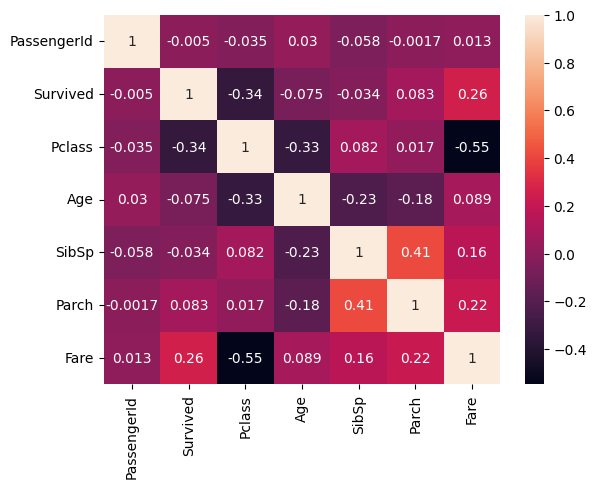

In [785]:
sns.heatmap(train.corr(),annot=True)

<Axes: xlabel='Sex', ylabel='count'>

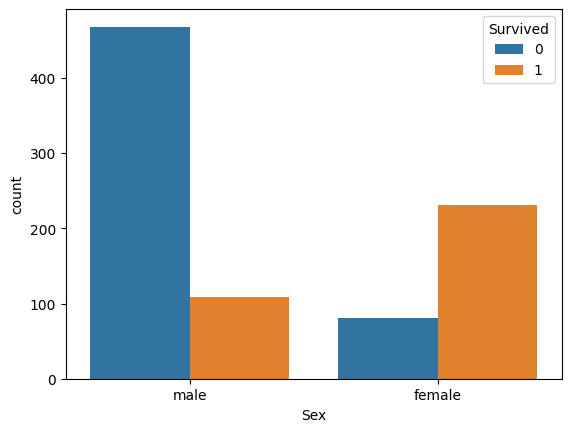

In [786]:
sns.countplot(x='Sex',hue='Survived',data=train)

<Axes: xlabel='Pclass', ylabel='count'>

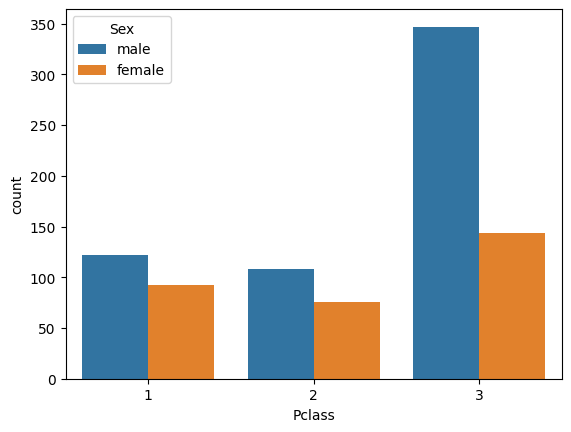

In [787]:
sns.countplot(x='Pclass',hue='Sex',data=train)

<Axes: xlabel='Pclass', ylabel='count'>

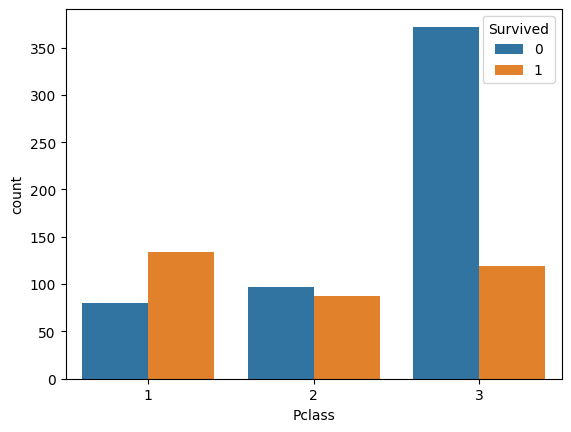

In [788]:
sns.countplot(x='Pclass',hue='Survived',data=train)

<Axes: xlabel='Age', ylabel='Count'>

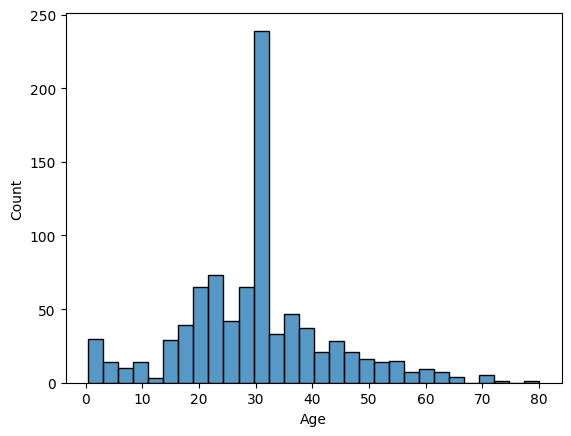

In [789]:
sns.histplot(train['Age'])

## Testing Data

In [790]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [791]:
test.shape

(418, 11)

In [792]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [793]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [794]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [795]:
test.drop(['Cabin'],axis=1,inplace=True)

In [796]:
test['Age'].fillna(test['Age'].mean(),inplace=True)

In [797]:
test.dropna(subset=['Fare'],inplace=True)

In [798]:
test.duplicated().sum()

0

In [799]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<ipython-input-800-b795203d8719>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test.corr(),annot=True)


<Axes: >

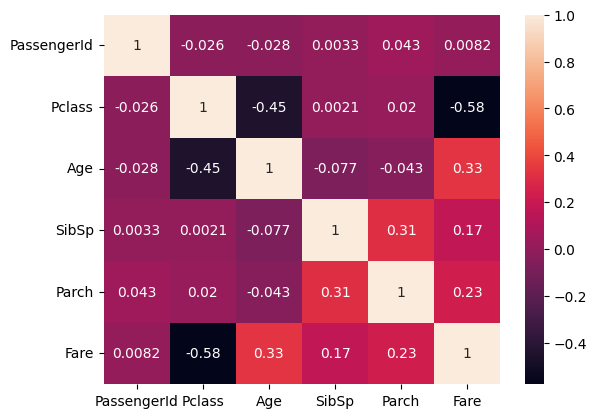

In [800]:
sns.heatmap(test.corr(),annot=True)

## Data Preprocessing

In [801]:
train.drop(['PassengerId','Name','Ticket','Embarked'],axis=1, inplace=True)

In [802]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [803]:
mean_fare_train = train['Fare'].mean()
print(mean_fare_train)

32.09668087739032


In [804]:
train['Fare'].replace(np.nan, mean_fare_train, inplace=True)

In [805]:
test.drop(['PassengerId','Name','Ticket','Embarked'],axis=1, inplace=True)

In [806]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875


In [807]:
mean_fare_test = test['Fare'].mean()
print(mean_fare_test)

35.627188489208635


In [808]:
test['Fare'].replace(np.nan, mean_fare_test, inplace=True)

In [809]:
from sklearn.preprocessing import OneHotEncoder

train = pd.get_dummies(train, columns=['Sex'])
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [810]:
train.drop('Sex_female', axis=1, inplace=True)

In [811]:
test = pd.get_dummies(test, columns=['Sex'])
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,0,1
1,3,47.0,1,0,7.0000,1,0
2,2,62.0,0,0,9.6875,0,1
3,3,27.0,0,0,8.6625,0,1
4,3,22.0,1,1,12.2875,1,0


In [812]:
test.drop('Sex_female', axis=1, inplace=True)

In [813]:
train = pd.get_dummies(train, columns=['Pclass'], drop_first=True)
train.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


In [814]:
test = pd.get_dummies(test, columns=['Pclass'], drop_first=True)
test.head()

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,1,0,1
1,47.0,1,0,7.0000,0,0,1
2,62.0,0,0,9.6875,1,1,0
3,27.0,0,0,8.6625,1,0,1
4,22.0,1,1,12.2875,0,0,1


## Model Building

In [815]:
x=train.drop(['Survived'],axis=1)
y=train['Survived']

In [816]:
x

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3
0,22.000000,1,0,7.2500,1,0,1
1,38.000000,1,0,71.2833,0,0,0
2,26.000000,0,0,7.9250,0,0,1
3,35.000000,1,0,53.1000,0,0,0
4,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,1,1,0
887,19.000000,0,0,30.0000,0,0,0
888,29.699118,1,2,23.4500,0,0,1
889,26.000000,0,0,30.0000,1,0,0


In [817]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [818]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [819]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x, y, test_size=0.20, random_state=42)

In [820]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg=LogisticRegression()

log_reg.fit(x_train,y_train)
log_pred=log_reg.predict(x_val)
log_acc = accuracy_score(y_val,log_pred)*100
print("Accuracy of Logistic Reg : ",log_acc)

Accuracy of Logistic Reg :  79.21348314606742


In [821]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

dt.fit(x_train,y_train)
dt_pred=dt.predict(x_val)
dt_acc=accuracy_score(y_val,dt_pred)*100
print("Accuracy of Decision Tree:", dt_acc)

Accuracy of Decision Tree: 76.40449438202246


In [822]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)

rf.fit(x_train,y_train)
rf_pred=rf.predict(x_val)
rf_acc=accuracy_score(y_val,rf_pred)*100
print("Accuracy of Random Forest:", rf_acc)

Accuracy of Random Forest: 79.21348314606742


In [823]:
import xgboost as xgb
xgb=xgb.XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5)

xgb.fit(x_train,y_train)
xgb_pred=xgb.predict(x_val)
xgb_acc=accuracy_score(y_val,xgb_pred)*100
print("Accuracy of XGBClassifier:", xgb_acc)

Accuracy of XGBClassifier: 81.46067415730337


In [824]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

knn.fit(x_train,y_train)
knn_pred=knn.predict(x_val)
knn_acc=accuracy_score(y_val,knn_pred)*100
print("Accuracy of KNN:", knn_acc)

Accuracy of KNN: 79.7752808988764


In [825]:
compare= {'model': ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier','KNeighborsClassifier'],
          'accuracy':[log_acc, dt_acc, rf_acc, xgb_acc, knn_acc]}
compare_df=pd.DataFrame(compare)
compare_df

,model,accuracy
0,LogisticRegression,79.213483
1,DecisionTreeClassifier,76.404494
2,RandomForestClassifier,79.213483
3,XGBClassifier,81.460674
4,KNeighborsClassifier,79.775281


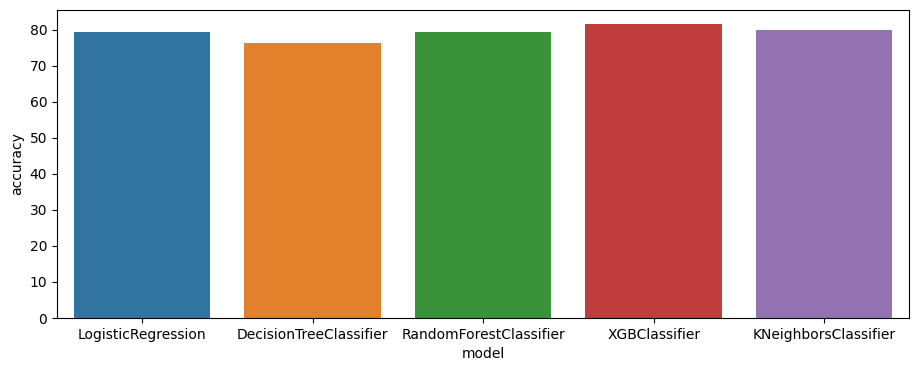

In [826]:
plt.figure(figsize=(11,4))
sns.barplot(x="model",y="accuracy",data=compare_df)
plt.show()

In [827]:
test['Survived']=xgb.predict(test)

In [831]:
test['Survived'].unique()

array([1, 0])

In [829]:
test.head()

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Survived
0,34.5,0,0,7.8292,1,0,1,1
1,47.0,1,0,7.0000,0,0,1,1
2,62.0,0,0,9.6875,1,1,0,1
3,27.0,0,0,8.6625,1,0,1,1
4,22.0,1,1,12.2875,0,0,1,0
